# PROJECT : US CUSTOMER SEGMENTATION

- PROJECT HIGHLIGHTS

    - `Prepare Data`

    - ``

LIBRARIES 

In [2]:
# Imprtoting Packages

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

KeyboardInterrupt: 

LOAD DATA


In [ ]:
us_data = pd.read_csv("US_data.csv")
us_data.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


SUBSET DATA

- It is a massive dataset and we just want to have a look.

- So after a view on data dictionary to understand every term, i finally came up with a conclusion that this dataset track all sorts of beaviours relating to the ways household earn, save, and spend money in UNITED STATE.

- Lets do our subsetting on focusing on those `households that have been turned down for credit or feard being denied credit in past 5 years` according to 2019.


- The above statement is termed as `TURNFEAR` coloumn , from which we can subset our data.  

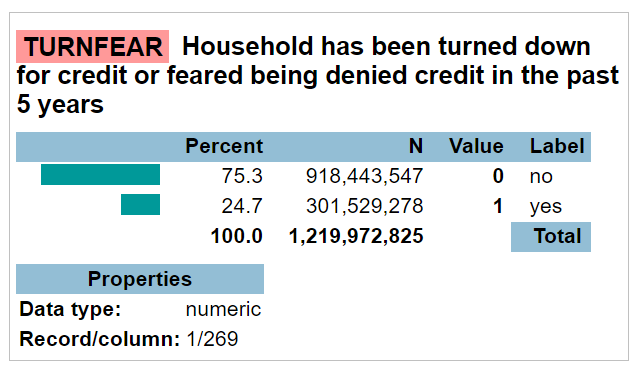

In [ ]:
# Masking data on basis of `TURNFEAR` 
us_mask = us_data["TURNFEAR"] == 1

# Total entries of mask
us_mask.sum()

4623

In [ ]:
# Subset data

us_fear = us_data[us_mask]

print("Shape of subset :",us_fear.shape)
us_fear.head()

Shape of subset : (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


In [ ]:
# Inforamtion about subset data

print(us_fear.info)

<bound method DataFrame.info of         YY1     Y1          WGT  HHSEX  AGE  AGECL  EDUC  EDCL  MARRIED  KIDS  \
5         2     21  3790.476607      1   50      3     8     2        1     3   
6         2     22  3798.868505      1   50      3     8     2        1     3   
7         2     23  3799.468393      1   50      3     8     2        1     3   
8         2     24  3788.076005      1   50      3     8     2        1     3   
9         2     25  3793.066589      1   50      3     8     2        1     3   
...     ...    ...          ...    ...  ...    ...   ...   ...      ...   ...   
28865  5810  58101  8883.849940      1   84      6    13     4        1     0   
28866  5810  58102  8968.383655      1   84      6    13     4        1     0   
28867  5810  58103  9220.708616      1   84      6    13     4        1     0   
28868  5810  58104  8927.245548      1   84      6    13     4        1     0   
28869  5810  58105  8977.193979      1   84      6    13     4        1     0

EXPLORING AGE COLUMN ('AGECL')

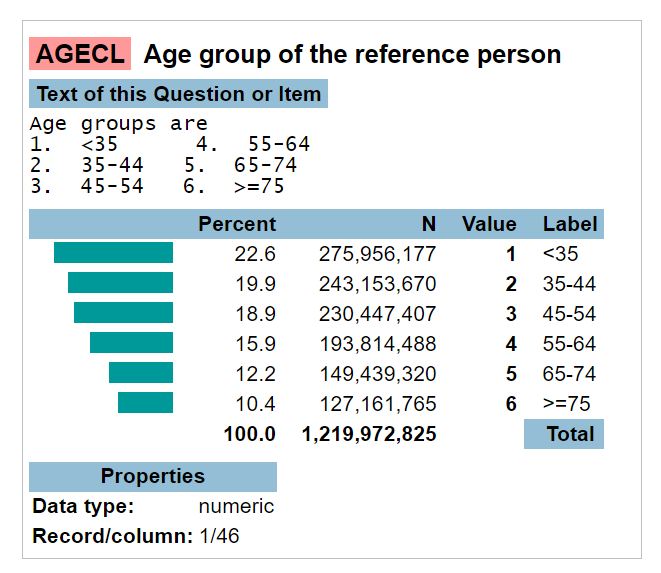

In [ ]:
# List up values of AGCL
us_fear["AGECL"].head()

5    3
6    3
7    3
8    3
9    3
Name: AGECL, dtype: int64

In [ ]:
# Unique values of AGCL
print("Total Groups :",us_fear["AGECL"].nunique())
print("Groups are :",us_fear["AGECL"].unique())

Total Groups : 6
Groups are : [3 5 1 2 4 6]


- Total age groups in our subset are : `6`

- Its hard to interpret these numerical data , so lets convert them to understandable format. 

In [ ]:
# Creating dictionary for corresponding values for age group

age_group_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_group = us_fear["AGECL"].replace(age_group_dict)
age_group.head()


5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

- Now we can visualize it.

Under 35       1307
35-44          1093
45-54           932
55-64           745
65-74           401
75 or Older     145
Name: AGECL, dtype: int64


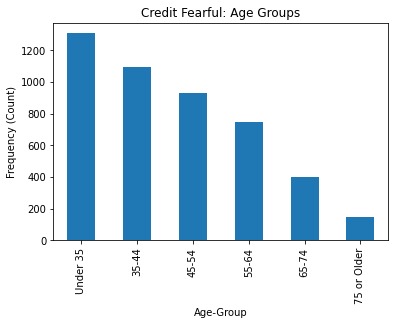

In [ ]:
# Age group bar chart

print(age_group.value_counts())

age_group.value_counts().plot(kind ="bar", xlabel = "Age-Group", ylabel= "Frequency (Count)", title = "Credit Fearful: Age Groups");

- Biggest group category for fearful credit is less that 35years.

> This mean age group of less than 35 are fear of getting rejected for credit.


Lets move beyond it and understand actual age groups present in data. I found an another column `AGE` which correspond to real age to deeply undersatnd under 35 age group.

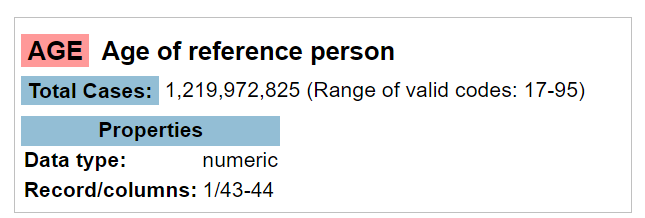

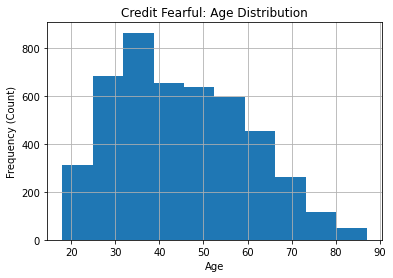

In [ ]:
# Plotting Overall Age Group

us_fear["AGE"].hist()
plt.xlabel("Age")
plt.ylabel("Frequency (Count)")
plt.title("Credit Fearful: Age Distribution");

- By inspecting we conclude that younger peoples are still more concerned about being able to secure a loan than older peoples, but people who are most concerned seems to be between  30 and 40.

Some other features 

- `RACE`

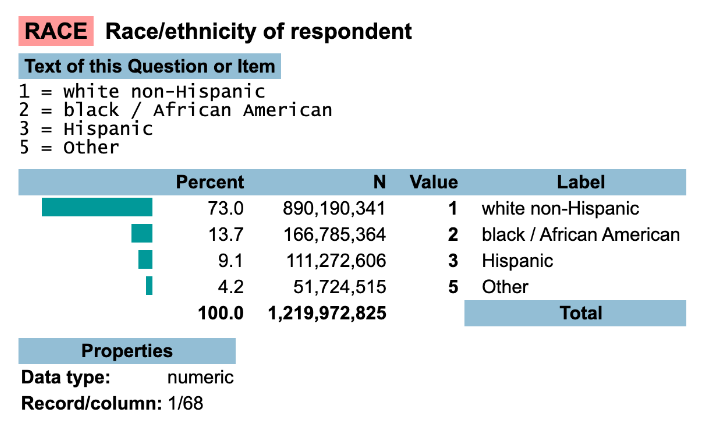

- Actually i dont know about it so after getting a sort hand this i had found.

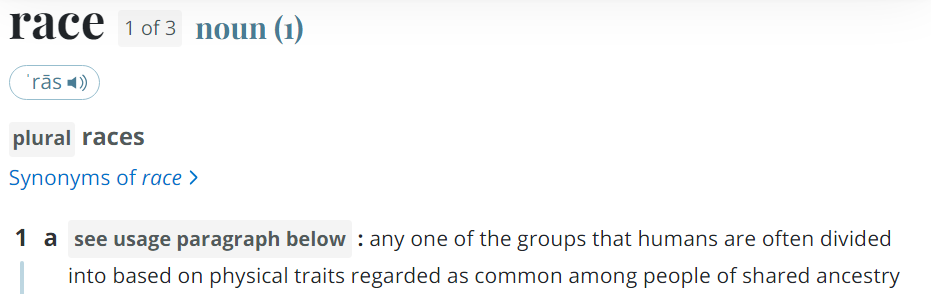

- Actually they devide people based on the traits (Physical).

- 4 labels are there :
    - 1 -> `White/Non-Hispanic`
    - 2 -> `Black/African-American`
    - 3 -> `Hispanic`
    - 5 -> `Other`

### Have u noticed that there is a missing digit 4 ???

- So i have found that the Asian category is missng from data which is such big blind spot in our data.

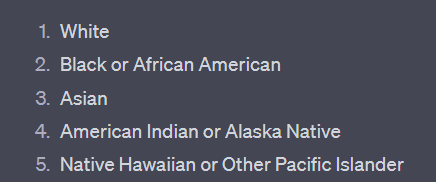

- As after getting much info about data and found that it is also a type of categorical data , which needs to be transformed for more better understanding.

In [ ]:
# Creating dictionary to convert values to their repective categories
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}

# Transforming into categorical data
race = us_fear["RACE"].replace(race_dict)

race.head()

5    White/Non-Hispanic
6    White/Non-Hispanic
7    White/Non-Hispanic
8    White/Non-Hispanic
9    White/Non-Hispanic
Name: RACE, dtype: object

In [ ]:
# Frequency of indivisual categoies
print("Frequency of Each Group :")
print(race.value_counts())

Frequency of Each Group :
White/Non-Hispanic        2494
Black/African-American    1098
Hispanic                   750
Other                      281
Name: RACE, dtype: int64


In [ ]:
# Percentage
print(race.value_counts(normalize =True))

White/Non-Hispanic        0.539477
Black/African-American    0.237508
Hispanic                  0.162232
Other                     0.060783
Name: RACE, dtype: float64


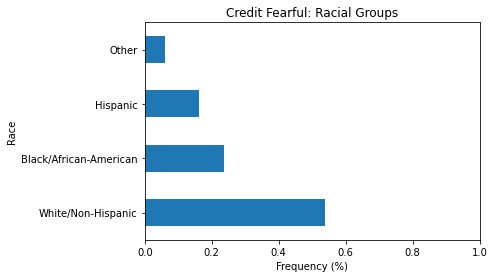

In [ ]:
race.value_counts(normalize =True).plot(kind = "barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

- Biggest subgroup is `White/Non-Hispanic`

> As per this most of the White non-hispanics in US are more being rejected for credit card.

- What we i think is it might be an contrast because there population are more than other racial groups.

So I had decided to plot the whole datset race chart to understand it more deeply. 

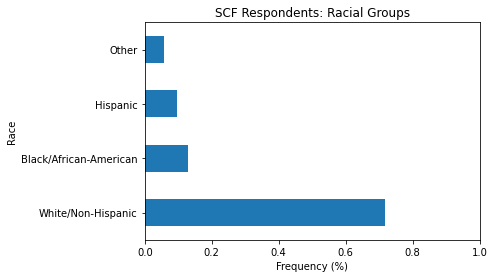

In [ ]:
whole_race  =us_data["RACE"].replace(race_dict)

whole_value_counts = whole_race.value_counts(normalize= True)

whole_value_counts.plot(kind ="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

### THIS COMPLETELY CHANGES MY PERCEPTION

- White non hespanics account for around 70% of whole dataset, but only 54% are fear for credit denied.

- While the Black and Hispanic are overall account of 23% of complete dataset, but the credit denied fear acoounts for them is around 40%.

## LET'SEXPLORE ABOUT INCOME 

- Represented in data as `INCCAT`.

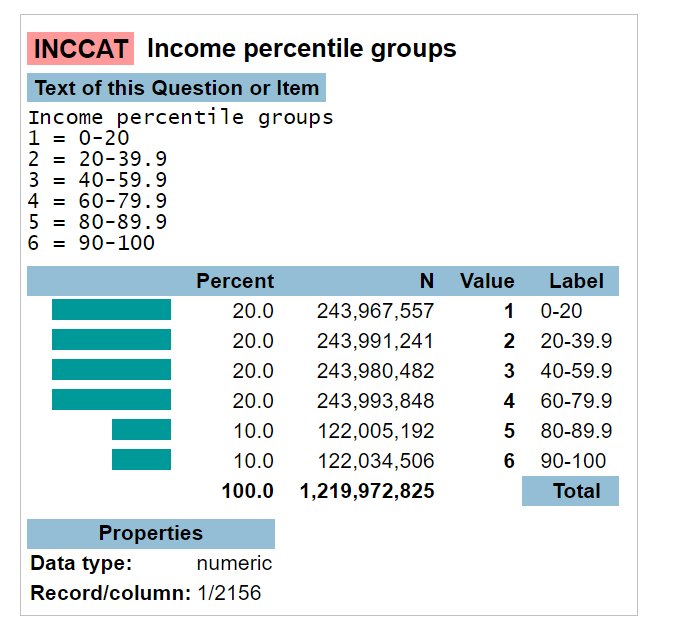

- I dont know about the reason of diiferent bins in which they seperated, as after getting data dictionary view first 3 label range of 20 bins while last 2 are of around 10 bins. 

- Here also we have to convert this to respective range so that we can better interpret it.

> Note this time we compare our subset data and complete data in parallel to account for overall view.

In [ ]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

# Data frame in which income is grouped by TURNFEAR
income_data = (
    us_data["INCCAT"]
    .replace(inccat_dict)
    .groupby(us_data["TURNFEAR"])
    .value_counts(normalize =True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)

income_data

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


- Plotting income grouped by turnfear.

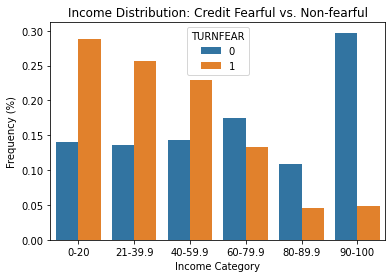

In [ ]:
sns.barplot(
    x= "INCCAT",
    y= "frequency",
    hue="TURNFEAR",
    data =income_data,
    order =inccat_dict.values()
)

plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

### LET'S EXPLORE ASSET

- Asset something you own that has a value.

- Want to know about assets owned by both credit and non credit families in their portfolios.


> I know that houses are like an assets for US citizens lets see is it real ??

In [ ]:
asset_house_corr = us_data["ASSET"].corr(us_data["HOUSES"])
print("Asset Houses Correlation:", asset_house_corr)

Asset Houses Correlation: 0.5198273544779253


- There is a medium correlation.

- For Americans, the value of their primary residence makes up most value in their total asset.


## IS IT SAME FOR OUR CREDIT FEAR SUBSET LETS CHECK😲

In [ ]:
asset_house_fear = us_fear["ASSET"].corr(us_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_fear)

Credit Fearful: Asset Houses Correlation: 0.583287973597916


- Its still moderate right.. but wait its different... how? come i will explain

- Relation between total value of assets and value of primary residence is stronger for `TURNFEAR` group than whole population.



- It getting more intresting for more deeper insights 

### GETTING COMPLETE CORRELATION of TOTAL POPULATION

- Added two new intresting terms.

> DEBT

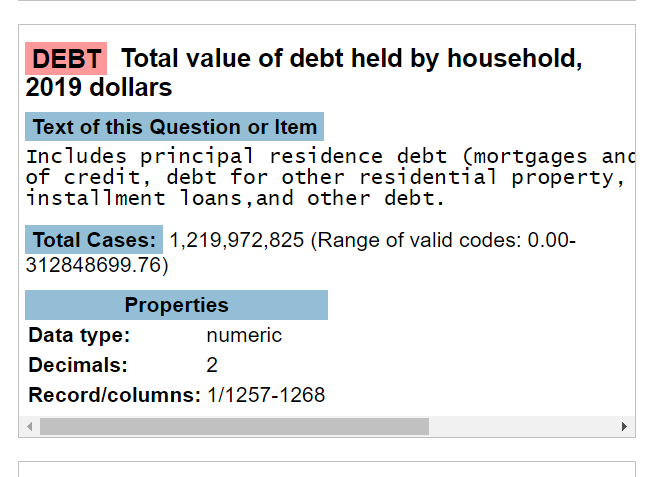

>EDUC

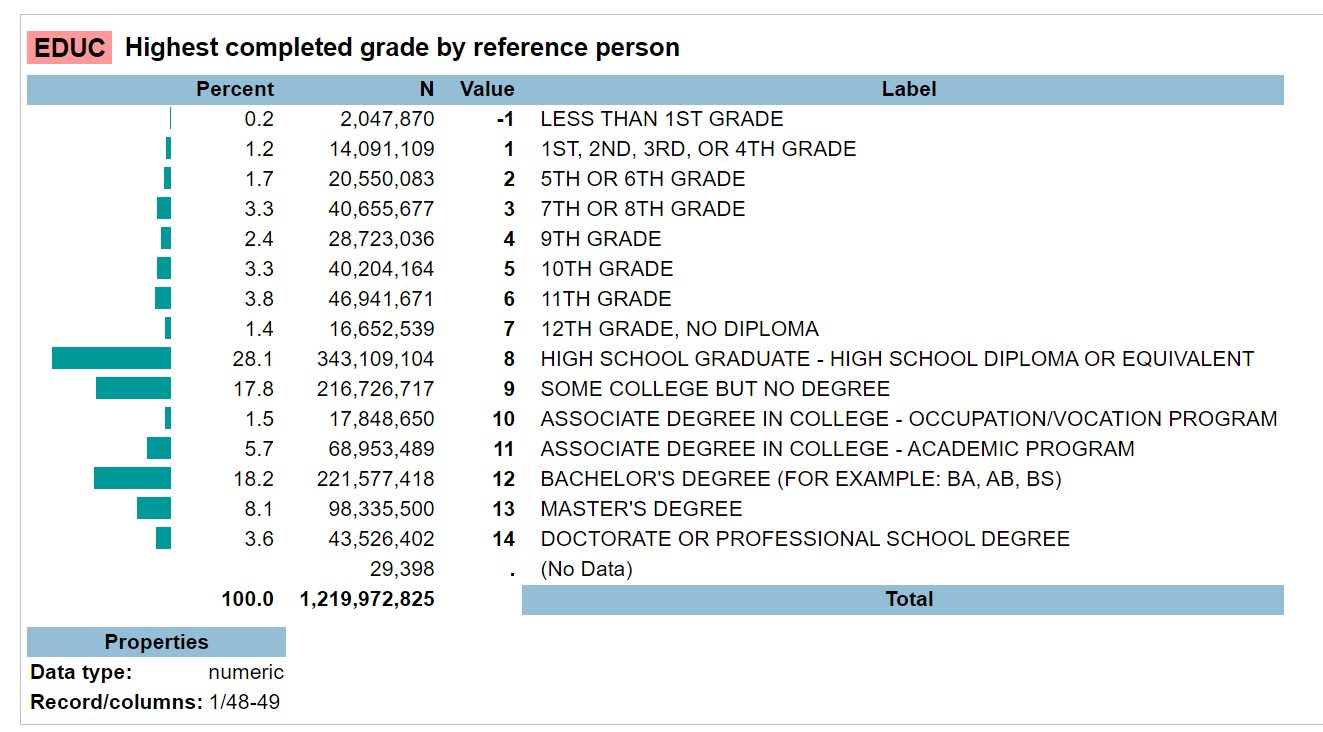

I think you understand it wel by your own, lets find relation between them

In [ ]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]

corr= us_data[cols].corr()

corr.head()

corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


- Strongest correlation of asset and income. 

- Stronger correlation of house with asset.

This means Higher the income , more the assets.


### GETTING COMPLETE CORRELATION of `TURNFEAR` SUBSET POPULATION

In [ ]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]

corr= us_fear[cols].corr()

corr.head()

corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


- For `TURNFEAR` subset :
    
    - Most of the debt comes from their home for families which are in credit denied condition.

    -  For credit fearful group most of their income comes from their assets, which is getting more stronger from previous one.

    

## UNDERSTANDING EDUCATION EFFECT 

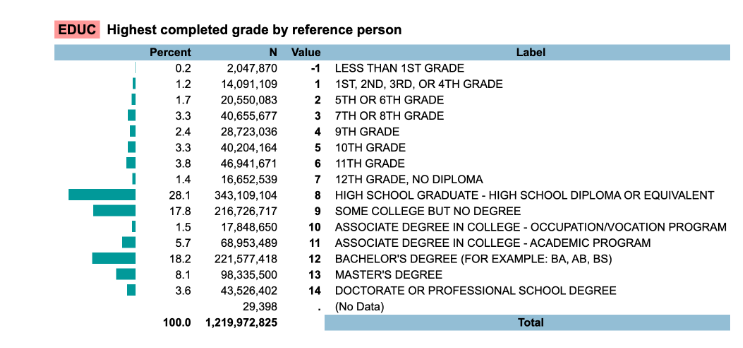

- There is possiblity of category transformation of the numerical values.

- But if we transform them it a little bit weird of that long label in our barchart so we keep them.

- I think we have to create a new frame consist of eductaion grup by `TURNFEAR`.

In [ ]:
us_educ = (
    us_data["EDUC"]
    .groupby(us_data["TURNFEAR"])
    .value_counts(normalize =True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)

us_educ.head()

,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


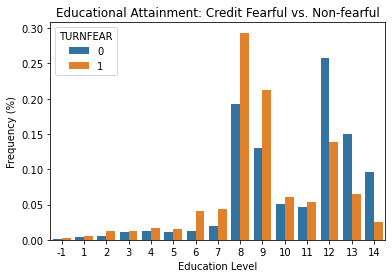

In [ ]:
sns.barplot(
    x="EDUC",
    y="frequency",
    hue ="TURNFEAR",
    data =us_educ
)

plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

- Most credit fear denied comes from group which are in `HIGH SCHOOL DIPLOMA` and `UNIVERSITY` students.

- Under 12 `COLLEGE DEGREE` there are more credit fearful groups than non credit fearful. More strongly represented on lower end of educational distribution.

- While `UNIVERSITY DEGREE`12 , `MASTER`13 AND `PHD/PROFESSIONAL`14, this means folks under `credit-fear` tends to have lower eductaion degree than our `non-credit fear` group.

### ASSET VS DEBT : WHOLE DATASET

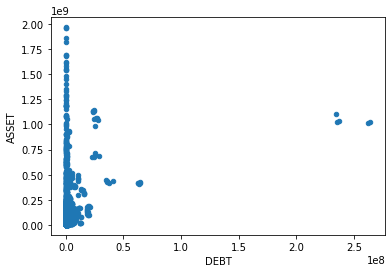

In [ ]:
# Scatter plot

us_data.plot.scatter(x = "DEBT", y ="ASSET");

- x_axis ranges to 250 million while y-axis ranges to 2 billion

- Have u noticed the outliers but they are not actually they have assets of billion with debt of millions, its preetty much acceptable.

- It also signifies that there is no relation between amount of debt to amount of asset.

### ASSET VS DEBT : SUBSET DATASET

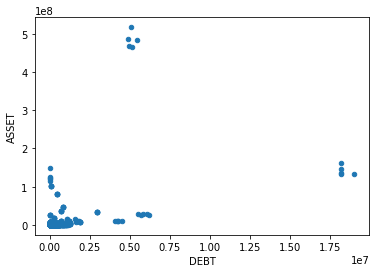

In [ ]:
# Scatter plot

us_fear.plot.scatter(x = "DEBT", y ="ASSET");

- X-axis range to 10 Million while y axis ranges to 100 million.

- We noticed two clusters 

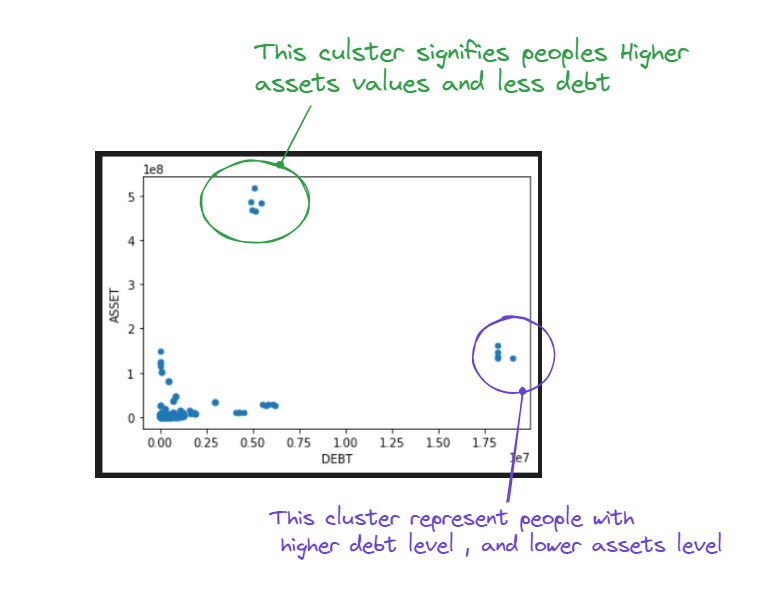

- While other shows normal ranges. 



### INTERPRET DEBT WITH HOUSE VALUE : SCATTERPLOTS

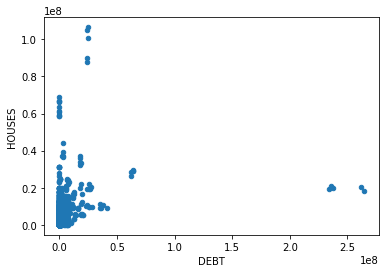

In [ ]:
# Create Scatterplot

us_data.plot.scatter(x ="DEBT", y ="HOUSES");

- As i remind u that corr value for these two were around 0.5.

- There are many house which are not very priced nu have high debt while there are house which are highly valued but have low debt. 

### INTERPRET DEBT WITH HOUSE VALUE FOR `TURNFEAR`  : SCATTERPLOTS

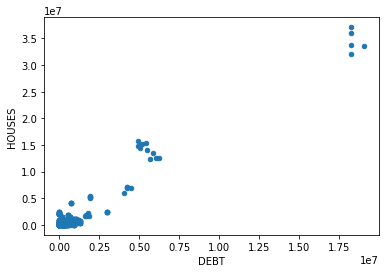

In [ ]:
us_fear.plot.scatter(x = "DEBT", y ="HOUSES");

- There are multiple groups forming in this case, to interpret these we further do clustering to get more insight about them.

## TIME FOR CLUSTERING


### 2 Feature clustering 

In [ ]:
# Creating wrangle function

def wrangle(filepath):
    df = pd.read_csv(filepath)
    mask = df["TURNFEAR"] ==1
    df =df[mask]
    return df

In [ ]:
data = wrangle("US_data.csv")
data.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


- Reconstruction of house value and debt plot

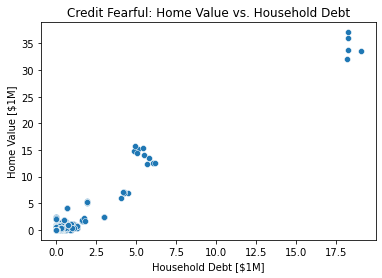

In [ ]:
sns.scatterplot(x= data["DEBT"] / 1e6, y=data["HOUSES"] / 1e6)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

## SPLIT DATA

In [ ]:
# Feature Matrix
X =data[["DEBT","HOUSES"]]
X.head()

,DEBT,HOUSES
5,12200.0,0.0
6,12600.0,0.0
7,15300.0,0.0
8,14100.0,0.0
9,15400.0,0.0


# UNSUPERVISED LEARNING AND KMEANS

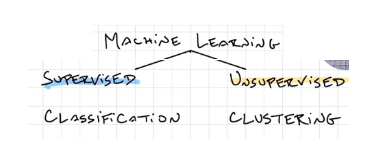

- Clustering is a type of unsupervised learning.

- In clustering we have a single feature matrix and we have to create clusters.

- k refers to numbers of cluster we requested.


- Here k is a kind of hyperparameter and we have to decide it before building the model.




- Understand Mechanism of complete process with given tool below for clustering 

In [ ]:
from teaching_tools.widgets import ClusterWidget, SCFClusterWidget
cw = ClusterWidget(n_clusters=3)
cw.show()

In [ ]:
# Cluster configuration for our data 
scfc = SCFClusterWidget(x=data["DEBT"], y=data["HOUSES"], n_clusters=3)
scfc.show()

## BUILDING KMEANS MODEL

In [ ]:
# Build model
model = KMeans(
    n_clusters=3,
    random_state =42
)

# Fit data
model.fit(X)

KMeans(n_clusters=3, random_state=42)

- Labels Extraction

In [ ]:
labels =model.labels_
labels[-10:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

- Plotting clusters

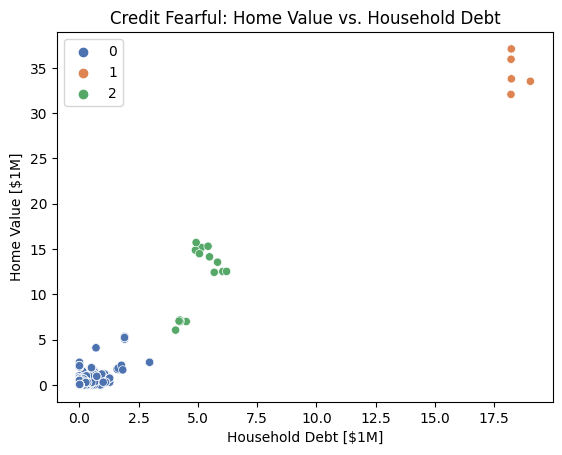

In [ ]:
sns.scatterplot(x= data["DEBT"] / 1e6, 
y=data["HOUSES"] / 1e6,
hue = labels,
palette ="deep")
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

- Extracting centroids 

In [ ]:
# Model centroids
centroids = model.cluster_centers_
centroids

array([[   91017.57766674,   116150.29328699],
       [18384100.        , 34484000.        ],
       [ 5065800.        , 11666666.66666667]])

- Plotting Centroids

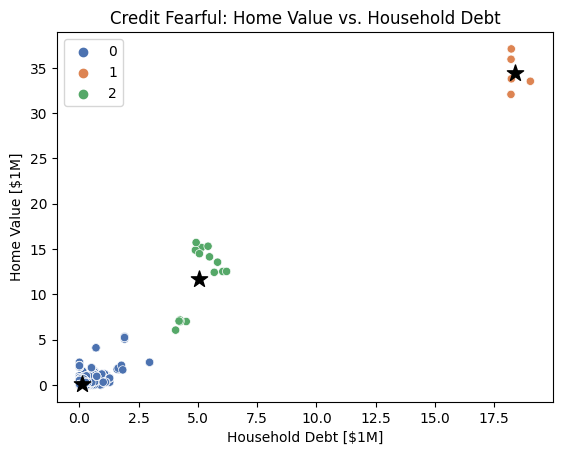

In [ ]:
sns.scatterplot(x= data["DEBT"] / 1e6, 
y=data["HOUSES"] / 1e6,
hue = labels,
palette ="deep")

plt.scatter(
    x=centroids[:,0] /1e6,
    y=centroids[:,1]/1e6,
    color = "black",
    marker= "*",
    s=150
)

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

### MODEL EQN

- Clustering perform cluster formation with some sort of distance calculation.


- `INERTIA` 


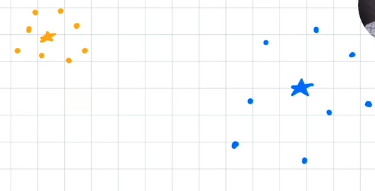
    
    - We have 2 clusters with their repective centroids.

    - yellow one have close data points related to centroid while blue one have far measure data points.

> Remeber that inertia works on within cluster sum of squares.

#### HOW INERTIA WORK ?

- It will take distance between point and centroid, measure it and square the distance. 

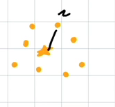

- Similarly do this for indivisual data point inside a cluster and then sum them up result in a single number, it will be the within sum of square of the cluster or inertia of cluster.

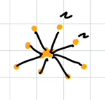

> So in this yellow one has better inertia (smaller within susm of square value) as compare to blue one.

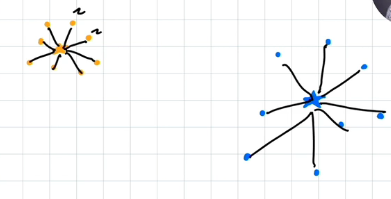


> If we interpret it so we going to every point and sum  them so our formula looks like.

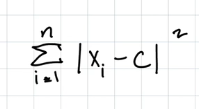

> Then also we have cluster so summing up overall results in :

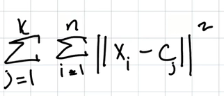

In [ ]:
inertia =model.inertia_
print("Inertia (3 clusters) : ", inertia)

Inertia (3 clusters) :  939554010797047.1


- Note that best inertia score is 1  and we are preety far from it.


##  SILHOUTTE SCORE 

- It measures distance between clusters.Lets understand it with help of Example.

> Suppose we have two different clusters on left we have good clusters because data points are close to their respective centroid while in other data points are in opposite centroids.

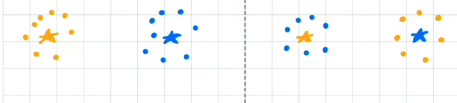

> To calculate silhoutte score, I had two start with 2 numbers.
    
- Calculate average distance between cluster centroid and its data point .

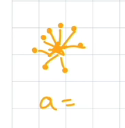

> Suppose this number is `a` which is 1 in this case .

- Calculate distance between same centroid and data points of other cluster, so it will `b` which is 10 in this case.

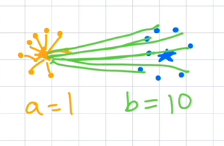

> So finally we calculate distance between them which is b-a , so we get 9, then i will devide it by max of a or b.

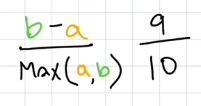

So calculating it will give 0.9 which is close to 1 means they are good cluster and they are ....


- Now think of opposite case

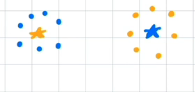

> So in this case our a let we assume it is 10 and b=1 just opposite right..😁

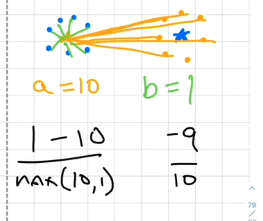

This time our result is -0.9 (worst sillevite score).


In [ ]:
ss =silhouette_score(X, model.labels_)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.9768842462944348


- Finding Best K

In [ ]:
n_clusters =range(2,13)
inertia_errors = []
Silhouette_Scores = []

for k in n_clusters:
    model2 = KMeans(n_clusters=k, random_state=42)
    model2.fit(X)
    inertia_errors.append(model2.inertia_)

print("Inertia Errors: ", inertia_errors)

Inertia Errors:  [3018038313336915.5, 939554010797047.1, 546098841715653.75, 309310386410919.4, 235243397481788.66, 182225729179699.53, 150670779013794.97, 114321995931020.7, 100340259483916.8, 86229997033602.34, 74757234072100.34]


Text(0.5, 1.0, 'KMeans Model :Inertia vs Number of Cluster')

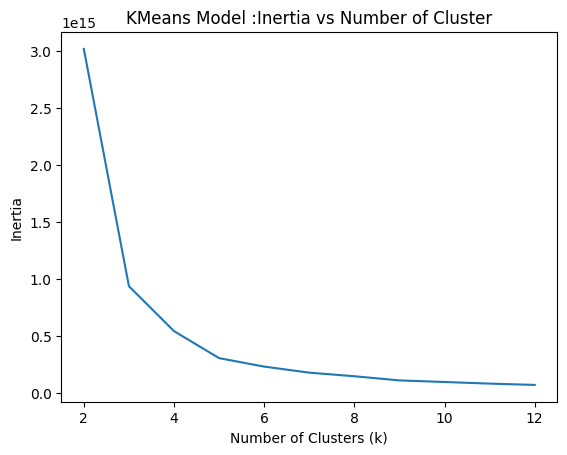

In [ ]:
# Plot 

plt.plot(n_clusters, inertia_errors)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("KMeans Model :Inertia vs Number of Cluster")

- Final Model


In [ ]:
final_model = KMeans(n_clusters=4, random_state=42)

final_model.fit(X)

KMeans(n_clusters=4, random_state=42)

## COMMUNICATION

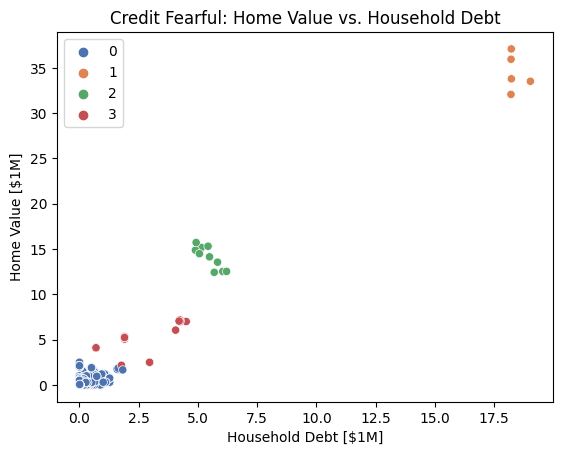

In [ ]:
sns.scatterplot(
    x =data["DEBT"]/1e6,
    y=data["HOUSES"]/1e6,
    hue =final_model.labels_,
    palette="deep"
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

- Getting centroids

In [ ]:
xgb = X.groupby(final_model.labels_).mean()
xgb

,DEBT,HOUSES
0,8.488629e+04,1.031872e+05
1,1.838410e+07,3.448400e+07
2,5.472800e+06,1.407400e+07
3,2.420929e+06,4.551429e+06


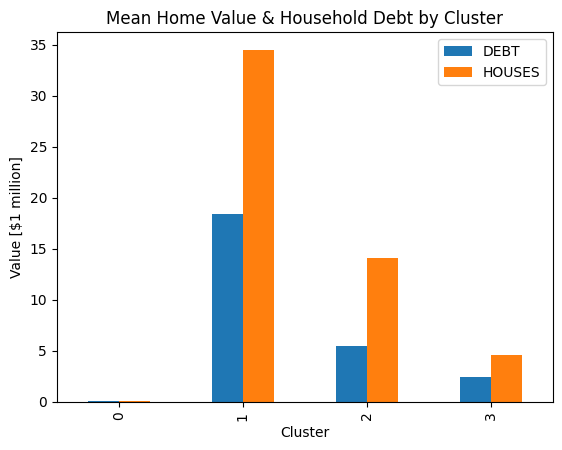

In [ ]:
# Build chart

(xgb/1e6).plot(kind ="bar")
plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");

<AxesSubplot: title={'center': 'Proportion of Debt to Home Value'}, xlabel='Clusters', ylabel='Proportion, DEBT/HOME'>

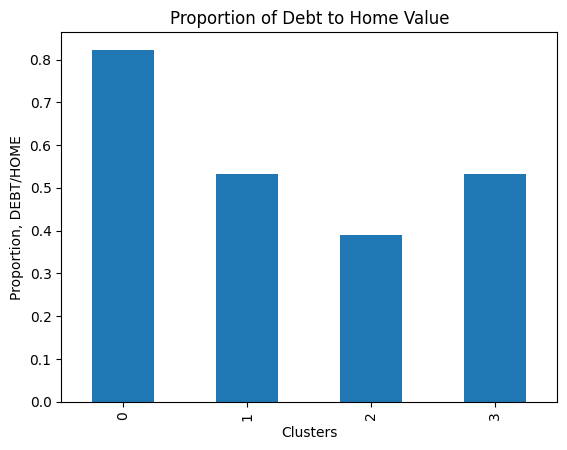

In [ ]:
(xgb["DEBT"]/xgb["HOUSES"]).plot(
    kind ="bar",
    xlabel="Clusters",
    ylabel="Proportion, DEBT/HOME",
    title="Proportion of Debt to Home Value"
)

## WORKING WITH MULTIPLE FEATURES

- This time we understand KMeans and PCA.

- `GOALS`
    
    - Determine highest variance features in dataset.

    - Build unsupervised model to devide ousehold into groups.

    - Mean characterstic of indivisual group.

    - Visualize clusters using PCA.
    


> NOTE : THIS TIME WE SUBSET OUR DATA ON BASIS OF EXISTING FEATURE `TURNFEAR` AND A NEW FEATURE `NETWORTH`. 

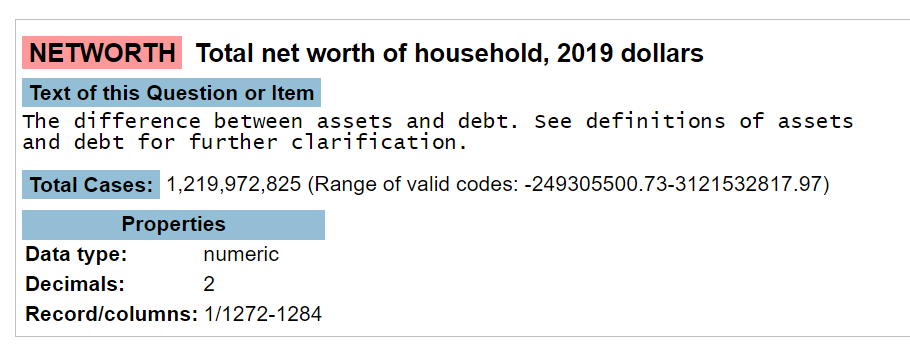

In [ ]:
# Importing Packages

import pandas as pd
import plotly.express as px
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# Wrangle function 

def wrangle(csv_file):

    df = pd.read_csv(csv_file)

    mask = (df["TURNFEAR"] == 1) & (df["NETWORTH"] <2e6) # less than 2 million

    df = df[mask]

    return df


- Gather data 

In [ ]:
# Load data 
new_data  =wrangle("US_data.csv")
new_data.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


- Selecting most important features using largest variance.

### WHAT IS  VARIANCE ?

- Suppose there is a series for `DEBT` in our subset calling it `x`.  We want to examine how spread the values in our x are , so we take variance here.

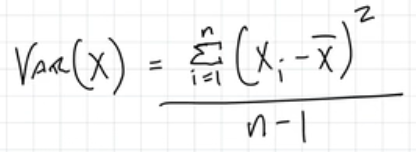




In [ ]:
# Top 10 values
top_ten_var = new_data.var().sort_values().tail(10)
top_ten_var

PLOAN1      1.140894e+10
ACTBUS      1.251892e+10
BUS         1.256643e+10
KGTOTAL     1.346475e+10
DEBT        1.848252e+10
NHNFIN      2.254163e+10
HOUSES      2.388459e+10
NETWORTH    4.847029e+10
NFIN        5.713939e+10
ASSET       8.303967e+10
dtype: float64

- Plotting Variance

In [ ]:
fig = px.bar(
    x =top_ten_var,
    y =top_ten_var.index,
    title = "HIGH VARIANCE FEATURES"
)
fig.update_layout(xaxis_title = "Variance", yaxis_title = "Features")

fig.show()

- ASSET is our most variance feature.

- Think that there may be some outliers as there are some ultra wealthy families here .

> Lets examine it by plotting their distributions indivisually

- Plot Distribution of NHNFIN (NON HOME, NON FINANCIAL ASSET )

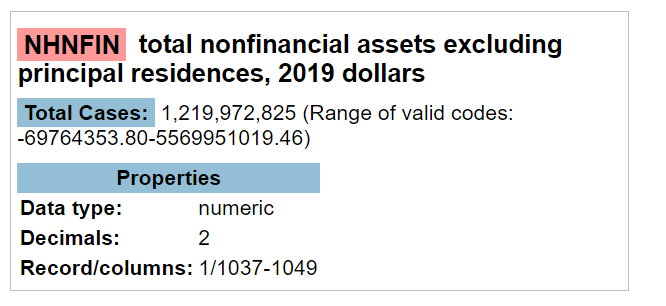

- It might be reason of  deviation in our variance calculation.

In [ ]:
fig = px.box(
    data_frame =new_data,
    x = "NHNFIN",
    title = "Distribution of Non-home, Non-Fiancial Assets"
)

fig.update_layout(xaxis_title = "Value [$]")
fig.show()

- Caught the first skewed element

- 95% of data lies below a million.

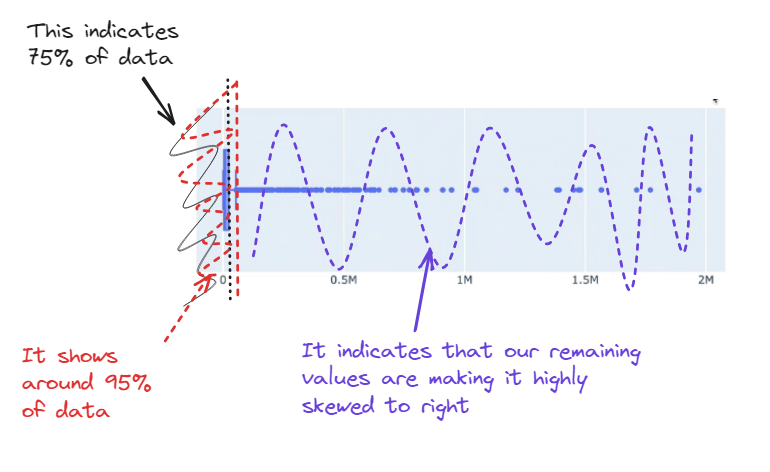



This is messing our understanding of variance as a little population with higher values affect distribution. Best way to get rid of it getting trimmed varirance.


### WHAT IS TRIMMED VARIANCE

suppose a set of numbers 

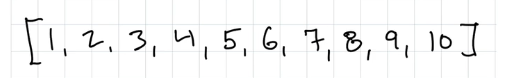

> In trimmed variance, I limit myself to middle 80% by removing top and last 10% of data.

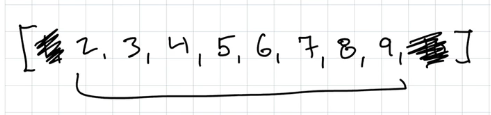

In [ ]:
top_10_trim_var = new_data.apply(trimmed_var).sort_values().tail(10)
top_10_trim_var

WAGEINC     5.550737e+08
HOMEEQ      7.338377e+08
NH_MORT     1.333125e+09
MRTHEL      1.380468e+09
PLOAN1      1.441968e+09
DEBT        3.089865e+09
NETWORTH    3.099929e+09
HOUSES      4.978660e+09
NFIN        8.456442e+09
ASSET       1.175370e+10
dtype: float64

- Plotting trimmed var

In [ ]:
fig = px.bar(
    x =top_10_trim_var,
    y =top_10_trim_var.index,
    title = "HIGH VARIANCE FEATURES"
)
fig.update_layout(xaxis_title = " Trimmed Variance", yaxis_title = "Features")

fig.show()

- Top 5 elements have lot after trimming, So these are our features for model.

- Extracting these 5 high var cols.

In [ ]:
high_var_cols = top_10_trim_var.tail(5).index.to_list()
high_var_cols

['DEBT', 'NETWORTH', 'HOUSES', 'NFIN', 'ASSET']

## SPLIT DATA 

In [ ]:
# Creating Feature Matrix

X = new_data[high_var_cols]
print("X shape :",X.shape)
X.head()

X shape : (4418, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
5,12200.0,-6710.0,0.0,3900.0,5490.0
6,12600.0,-4710.0,0.0,6300.0,7890.0
7,15300.0,-8115.0,0.0,5600.0,7185.0
8,14100.0,-2510.0,0.0,10000.0,11590.0
9,15400.0,-5715.0,0.0,8100.0,9685.0


## BUILD MODEL

- Standardization 

    - We are now on higher dimensions, So distances become further. To make it same scale we do a thing called standardization.


<!-- ### WHAT IS STANDARDIZATION ?    -->

In [ ]:
# Mean and standard deviation for X
X_summary = X.aggregate(["mean","std"])
X_summary

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
mean,72701.258488,76387.768900,74530.805794,117330.637166,149089.027388
std,135950.435529,220159.684405,154546.415791,239038.471726,288166.040553


### PROCESS OF STANDARDIZATION (STANDARD SCALAR)

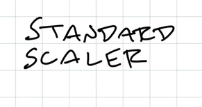

- It is a kind of Transformer.

> It will extract a coloumn and subtract indivisual values from  overall mean of the column, then devide it by standard deviation.

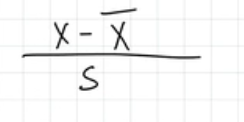

> by putting it in scandard scalar, we make mean=0, and standard deviation become 1. 


In [ ]:
# Instantiate transformer
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns=X.columns)

print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled shape: (4418, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,-0.445075,-0.377486,-0.48231,-0.474583,-0.498377
1,-0.442132,-0.368401,-0.48231,-0.464541,-0.490047
2,-0.422270,-0.383868,-0.48231,-0.467470,-0.492494
3,-0.431097,-0.358407,-0.48231,-0.449061,-0.477206
4,-0.421534,-0.372966,-0.48231,-0.457010,-0.483818


In [ ]:
# Verify mean and std 

X_scaled_summary = X_scaled.aggregate(["mean","std"]).astype(int)
X_scaled_summary

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
mean,0,0,0,0,0
std,1,1,1,1,1


- Creating pipeline and tuning

In [ ]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # model Build 
    model = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=k,random_state=42)
    )
    # Train
    model.fit(X)

    # Calculate inertia
    inertia_errors.append(model.named_steps["kmeans"].inertia_)

    silhouette_scores.append(
        silhouette_score(X, model.named_steps["kmeans"].labels_)
    )

print("Inertia : ", inertia_errors[:3])
print()
print("Silhouette Scores : ", silhouette_scores[:3])

Inertia :  [11028.058082607182, 7190.526303575348, 5924.997726868024]

Silhouette Scores :  [0.7464502937083215, 0.7044601307791996, 0.6962653079183132]


- Elbow plot

- Inertia VS cluster



In [ ]:
fig =px.line(
    x= n_clusters, 
    y=inertia_errors,
    title= "K-Means Model: Inertia Vs Number of Clusters"
)
fig.update_layout(xaxis_title= "Number of Clusters (k)", yaxis_title = "Inertia")
fig.show()

- Best cluster k = 4 or 5  

- Silhouette Score Vs Clusters

In [ ]:
fig =px.line(
    x= n_clusters, 
    y= silhouette_scores,
    title= "K-Means Model: Silhouette Scores Vs Number of Clusters"
)
fig.update_layout(xaxis_title= "Number of Clusters (k)", yaxis_title = "Silhouette Scores")
fig.show()

- Again 4 is our final hypermeter.

In [ ]:
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=4, random_state=42)
)

final_model.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

- Extracting labels from model.


In [ ]:
labels = final_model.named_steps["kmeans"].labels_
labels

array([0, 0, 0, ..., 1, 1, 1])

- Usign labels to get centroid

In [ ]:
xgb = X.groupby(labels).mean()
xgb

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,26551.075439,13676.153182,13745.637777,2.722605e+04,4.022723e+04
1,218112.818182,174713.441558,257403.246753,3.305884e+05,3.928263e+05
2,116160.779817,965764.155963,264339.449541,7.800611e+05,1.081925e+06
3,732937.575758,760397.575758,826136.363636,1.276227e+06,1.493335e+06


- Plotting chart

In [ ]:
fig = px.bar(
    xgb,
    barmode ="group",
    title = "Mean Household Finances by Clusters"
)

fig.update_layout(xaxis_title = "Cluster", yaxis_title= "Value [$]")
fig.show()

## CREATING PCA TRANSFORMER

- PCA transformer is used for dimenionality reduction.

- It reduced dimension of data to prevent far distance cluster formation.

- Our transformer convert our multidimensional data to 2D data.

### INTUTION OF PCA

> Let create a bicycle which is a 3d physical object to a 2d representation which mights looks like, Most will make the side view.

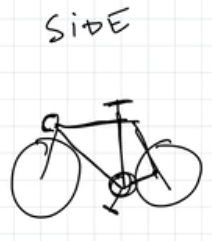

> What if we draw it from fronts, It might looks as.

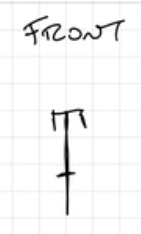

> Have u ever think why u always make a side way rather than front one.

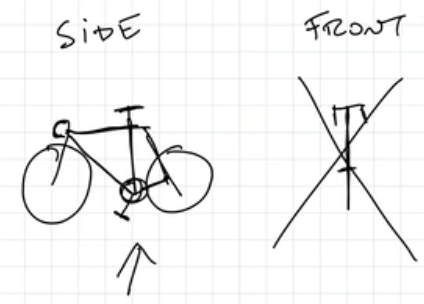

> Our pyscology behaviour works in such a way that we can create objects such that it will retrive more information itself. 

> Similarly will done in PCA, it will reduce  dimension of objects as well try to capture maximum information.

- PCA will generally used in model building when there are lot of features.

In [ ]:
# Instantiate transformer
pca = PCA(n_components=2,random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=["PC1","PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (4418, 2)


,PC1,PC2
0,-221525.424530,-22052.273003
1,-217775.100722,-22851.358068
2,-219519.642175,-19023.646333
3,-212195.720367,-22957.107039
4,-215540.507551,-20259.749306


- Scatter plot


In [ ]:
fig = px.scatter(
    data_frame = X_pca,
    x= "PC1",
    y="PC2",
    color=labels.astype(str),
    title="PCA Representation Of Clusters"
)


fig.update_layout(xaxis_title = "PC1", yaxis_title= "PC2")
fig.show()

- Hope so u learn a lot as i had learn from this project .. Best of luck ..Try your own..